# Data Analysis & Visualization
## WeRateDogs Project
### By Emadeldin (Emad) Fawaz

## Introduction

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. As it might be obvious, because "they're good dogs." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively to be used in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. 

Tweepy package and tweeter API was used to collect the current status (retweet and favorite status) for the provided tweet IDs.  At this stage, it is important to acknowledge that tweeter enabled me a developer account and provided me with needed keys to use tweeter APIs. A software was used to predict the dog breed in the tweets. The predictions were supplied in a separate data file.

In the previous data wrangling efforts, data were gathered, assessed, cleaned and finally combined in one master document to be used in data analysis and visualization.


This data analysis project will attempt to answer these questions:-

- Does one class of DoggoLingo receive more ratings than the others?
- Is dog class (DoggoLingo) „doggo, puppo... etc“ is associated with higher retweets and favourites?
- Is there a specific breed that has more retweets and favourite records than the others?
- Is there a relationship between ratings, favourite counts and retweets?


In [1]:
# Import needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Read dataframe
tw_master = pd.read_csv('twitter_archive_master.csv')

## Analysing dog classification (DoggoLingo) and ratings

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


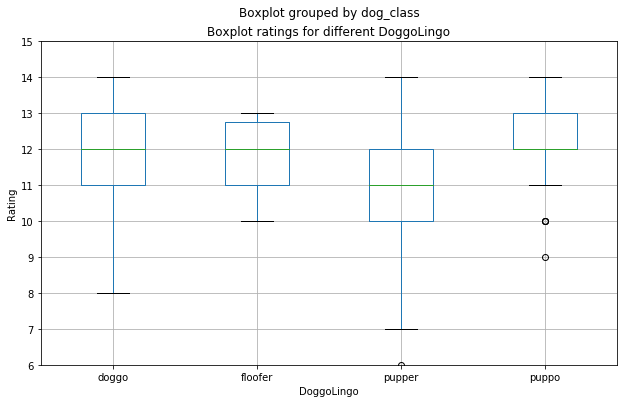

In [3]:
# Plot the DoggoLingo with ratings
plt.rcParams['figure.figsize']=(10,6)
tw_master[pd.notnull(tw_master['dog_class'])].boxplot(column = ['rating_numerator'], by = ['dog_class'])
plt.ylim((6,15))
plt.title('Boxplot ratings for different DoggoLingo')
plt.xlabel('DoggoLingo')
plt.ylabel('Rating');

The box plot indicates that there is more consistency in rating puppo dogs high. There is also more consistency in rating the pupper dogs less than the others.

## Analysing dog classification (DoggoLingo) and retweets

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


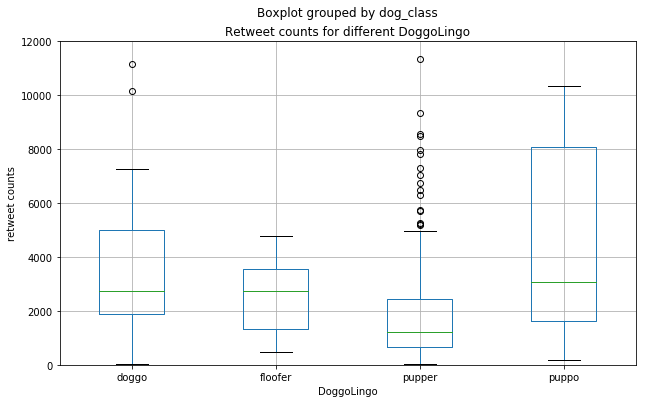

In [4]:
# Plot the DoggoLingo with retweets
plt.rcParams['figure.figsize']=(10,6)
tw_master[pd.notnull(tw_master['dog_class'])].boxplot(column = ['retweets'], by = ['dog_class'])
plt.ylim((0,12000))
plt.title('Retweet counts for different DoggoLingo')
plt.xlabel('DoggoLingo')
plt.ylabel('retweet counts');

Puppos were retweeted more than the others on average.  

## Analysing dog classification (DoggoLingo) and favourite counts

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


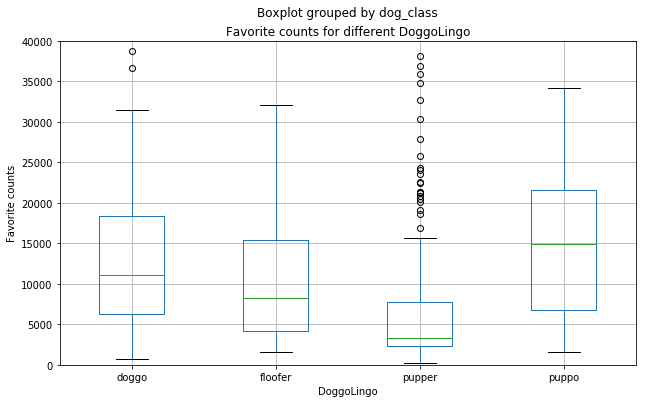

In [5]:
# Plot the DoggoLingo with favourite counts
plt.rcParams['figure.figsize']=(10,6)
tw_master[pd.notnull(tw_master['dog_class'])].boxplot(column = ['favorites'], by = ['dog_class'])
plt.ylim((0,40000))
plt.title('Favorite counts for different DoggoLingo')
plt.xlabel('DoggoLingo')
plt.ylabel('Favorite counts');

Puppos received consistently more favorite than the others. 

## Is there a specific breed that has more retweets and favourite record than the others?

### What are the most famous breeds?

In [6]:
# Selecting rows where the breed is identified
df = tw_master[pd.notnull(tw_master.Breed_probability1)]

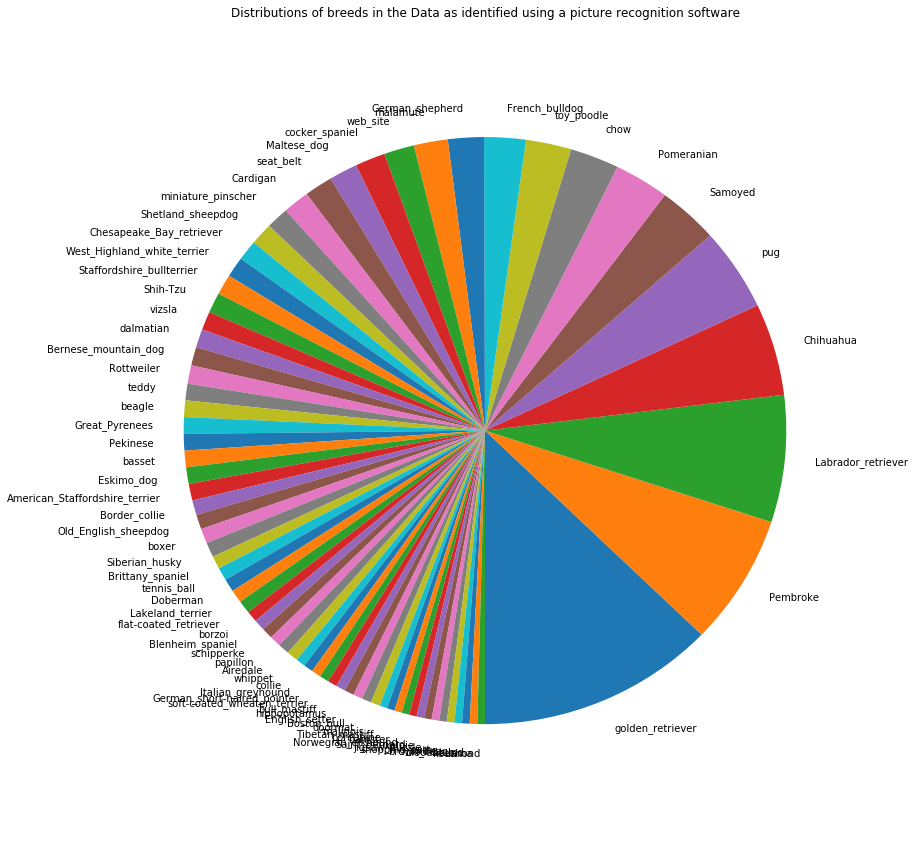

In [7]:
# Piechart
plt.rcParams['figure.figsize']=(15,15)

import matplotlib.pyplot as plt
df.Breed_probability1.value_counts(sort=True).plot.pie(startangle=270, pctdistance=0.8, radius = 0.9)
plt.title('Distributions of breeds in the Data as identified using a picture recognition software')
plt.ylabel('')
plt.show();

Golden retriever, pembroke, Labrador retriever and Chihuahua are the most common dog breeds.
Some strange values like Seat-Belt still exist in the data which need to be cleaned.

There are 73 different breeds in this data (Note: that appeared more than 3 times). 
Some strange values like "Seat Belt" still exist in the data and need to be cleaned.

### Is there a specific breed that received more favorite than the others? 

In [8]:
df1 = df[['Breed_probability1', 'favorites']] 
df1.sort_values('favorites', ascending = False).groupby(['Breed_probability1'], sort = False).describe().head()

favorites                                                \
                       count          mean           std     min       25%   
Breed_probability1                                                           
Labrador_retriever      69.0  13210.057971  22475.237256     0.0   2084.00   
Chihuahua               48.0   9078.666667  19266.803338     0.0   1406.50   
French_bulldog          21.0  18764.714286  27144.160514   324.0   3138.00   
Eskimo_dog               9.0  21996.444444  38228.468574   520.0   3634.00   
swing                    4.0  31424.000000  34736.333495  7826.0  10702.25   

                                                 
                        50%       75%       max  
Breed_probability1                               
Labrador_retriever   6308.0  16428.00  164825.0  
Chihuahua            3128.5  10448.25  127525.0  
French_bulldog       8579.0  25628.00  122396.0  
Eskimo_dog           7594.0  16764.00  121844.0  
swing               17667.5  38389.25   82535.0

In [9]:
df1 = df[['Breed_probability1', 'favorites']] 
df2 = df1.sort_values('favorites', ascending = False).groupby(['Breed_probability1'], sort = False).describe()
df2.sort_values(('favorites', 'mean'), ascending = False).head()

favorites                                      \
                             count          mean           std     min   
Breed_probability1                                                       
swing                          4.0  31424.000000  34736.333495  7826.0   
Eskimo_dog                     9.0  21996.444444  38228.468574   520.0   
hippopotamus                   5.0  19370.800000  14978.596620     0.0   
French_bulldog                21.0  18764.714286  27144.160514   324.0   
Chesapeake_Bay_retriever      11.0  15463.454545  22450.069547   220.0   

                                                                 
                               25%      50%       75%       max  
Breed_probability1                                               
swing                     10702.25  17667.5  38389.25   82535.0  
Eskimo_dog                 3634.00   7594.0  16764.00  121844.0  
hippopotamus              10803.00  19468.0  27759.00   38824.0  
French_bulldog             3138.00   8579.0  25628.00  122396.0  
Chesapeake_Bay_retriever   4154.00   7036.0  16719.50   78725.0

A dog from the Labrador_retriever breed received the maximum number of favourites (164825). On average, Swings received higher favourites (average = 31424) than the others. In the second place for favourites comes the Eskimo_dog (average = 21996).


### Is there a specific breed that received more retweets than the others?

In [10]:
df1 = df[['Breed_probability1', 'retweets']] 
df1.sort_values('retweets', ascending = False).groupby(['Breed_probability1'], sort = False).describe().head()

retweets                                               \
                      count          mean           std     min      25%   
Breed_probability1                                                         
Labrador_retriever     69.0   5054.855072  10852.252964    91.0   857.00   
Eskimo_dog              9.0   8808.666667  20119.569770   155.0  1112.00   
Chihuahua              48.0   3277.125000   8812.832145    48.0   512.25   
French_bulldog         21.0   4913.666667   8029.780030   118.0   768.00   
swing                   4.0  10910.500000  15358.554066  2718.0  3120.75   

                                               
                       50%       75%      max  
Breed_probability1                             
Labrador_retriever  2147.0   4843.00  84021.0  
Eskimo_dog          2105.0   3031.00  62256.0  
Chihuahua           1148.5   3128.50  61245.0  
French_bulldog      2556.0   4473.00  35603.0  
swing               3492.0  11281.75  33940.0

In [11]:
df1 = df[['Breed_probability1', 'retweets']] 
df2= df1.sort_values('retweets', ascending = False).groupby(['Breed_probability1'], sort = False).describe()
df2.sort_values(('retweets', 'mean'), ascending = False).head()

retweets                                               \
                      count          mean           std     min      25%   
Breed_probability1                                                         
swing                   4.0  10910.500000  15358.554066  2718.0  3120.75   
hippopotamus            5.0  10206.600000   3958.409630  4916.0  7054.00   
brown_bear              4.0   9947.500000  11042.119769   286.0   434.50   
Eskimo_dog              9.0   8808.666667  20119.569770   155.0  1112.00   
Tibetan_mastiff         4.0   5974.750000   4098.844177   987.0  3432.75   

                                                
                        50%       75%      max  
Breed_probability1                              
swing                3492.0  11281.75  33940.0  
hippopotamus        12211.0  13426.00  13426.0  
brown_bear           9997.0  19510.00  19510.0  
Eskimo_dog           2105.0   3031.00  62256.0  
Tibetan_mastiff      6790.0   9332.00   9332.0

A dog from the Labrador_retriever breed received the maximum number of retweets (84021). On average, Swings received higher retweets (average = 10910) than the others. In the second place for retweets comes the hippopotamus (average = 10206).


## Is there a relationship between ratings, favourite count and retweets?

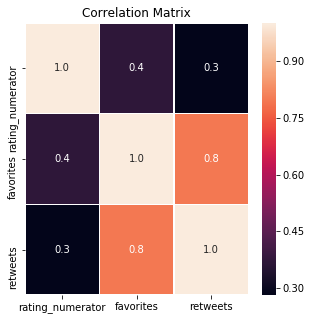

In [12]:
# Plotting the correlation map to investigate if there is a relationship between the variables
import seaborn as sns

f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(tw_master[['rating_numerator', 'favorites', 'retweets']].corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.title('Correlation Matrix');

In [13]:
df = tw_master[['rating_numerator', 'favorites', 'retweets']]
corr = df.corr()
corr.style.background_gradient()

,rating_numerator,favorites,retweets
rating_numerator,1,0.370906,0.282316
favorites,0.370906,1,0.797074
retweets,0.282316,0.797074,1


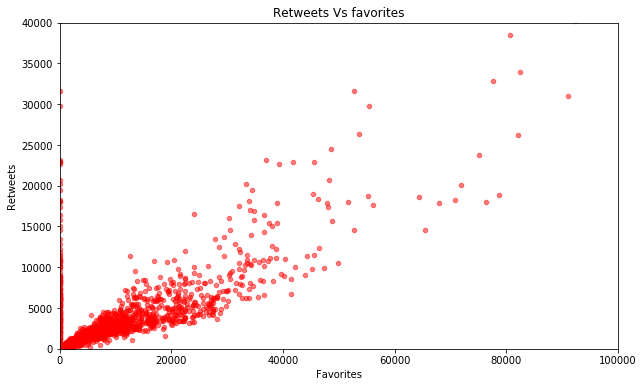

In [19]:
# favorite_count and retweet_count
plt.rcParams['figure.figsize']=(10,6)

tw_master.plot(kind = 'scatter', x = 'favorites', y = 'retweets', alpha = 0.5, color = 'red')
plt.xlim((0,100000))
plt.ylim((0,40000))
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets Vs favorites');

It is normal to expect that not all favorited tweets were retweeted and vice versa. This caused the line of dots at the favorites value of zero. 

There is a linear relationship between the retweet counts and the favourite counts. The regression coefficient for this relationship is strong (r= 0.797). This relationship might be already expected as people will favourite what they retweet or the other way around.
Interesting, the rating have a weak significant correlation (r = 0.371) with favorits but not that significant correlation with retweets. This indicates that people might favour high rated dogs. This causality relationship could be justified because the dogs are been rated by WeRateDogs first and before people react (by favouring or retweeting) to them.

## Conclusion

There is more consistency in rating puppo dogs high. There is also more consistency in rating the pupper dogs less than the others. Puppos, on average, were retweeted more than the others and received more favorites as well. 

Golden retriever, pembroke, Labrador retriever and Chihuahua are the most common dog breeds in WeRateDogs data. Some strange values like Seat-Belt still exist in the data which need to be re-cleaned. A dog from the Labrador_retriever breed received the maximum number of favourites and retweets. On average, Swings received higher retweets (average = 10910) than the others. In the second place for retweets comes the Brown Bears (average = 9947).

It is normal to expect that not all favorited tweets were retweeted and vice versa. However, there is a linear relationship between the retweet counts and the favourite counts. The regression coefficient for this relationship is strong (r= 0.797). This relationship might be already expected as people will favourite what they retweet or the other way around.

Interesting, the rating have a weak significant correlation (r = 0.371) with favorits but not that significant correlation with retweets. This indicates that people might favour high rated dogs. This causality relationship could be justified because the dogs are been rated by WeRateDogs first and before people react (by favouring or retweeting) to them.


In [20]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')